# KPI 도출 비즈니스 전략

KPI: 한번 거래 시의 금액(feat. 배송비)

제안하는 전략: 전체적인 매출액을 올리기 위해서, 기존 구매자를 붙잡기 보다 현재 가장 비싸게 팔 수 있는 것을 팔자!

기존 구매율을 늘리는 방향성을 지양하고, 전체적인 거래액을 늘리는 배송비를 높이는 방향의 KPI를 제안합니다.
현재 분석한 회사는 기존 고객 층이 형성되지 않았고, 기존고객 역시도 거래량이 적음을 보아서, 

기존 고객을 유지하기 위한 회사가 아닌, 그때, 그때, 접속해서 이용하는 회사로 분석됩니다. 

그렇기에 제가 제안하는 전략은 배송비가 높은 가격의 물건을 늘리자입니다.

그리디 알고리즘과도 같습니다. 미래에 대한 거래가 보장되지 않으니, 현재 매출을 올릴 수 있을 만큼 올려야 합니다. 

그러므로 고 비용의 물품들을 장려하는 방향을 주장합니다


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.style.use("ggplot")
plt.rc('font', family='NanumGothic')

dataset_path = './data/'

In [ ]:


customer = pd.read_csv(dataset_path+'customers.csv')
location = pd.read_csv(dataset_path+'locations.csv')
order_items = pd.read_csv(dataset_path+'order_items.csv')
orders = pd.read_csv(dataset_path+'orders.csv')
payments = pd.read_csv(dataset_path+'payments.csv')
product = pd.read_csv(dataset_path+'products.csv')
review = pd.read_csv(dataset_path+'reviews.csv')
seller = pd.read_csv(dataset_path+'sellers.csv')

## 전략 목표 설정

### 월별 매출 추이와 MAU의 상관관계

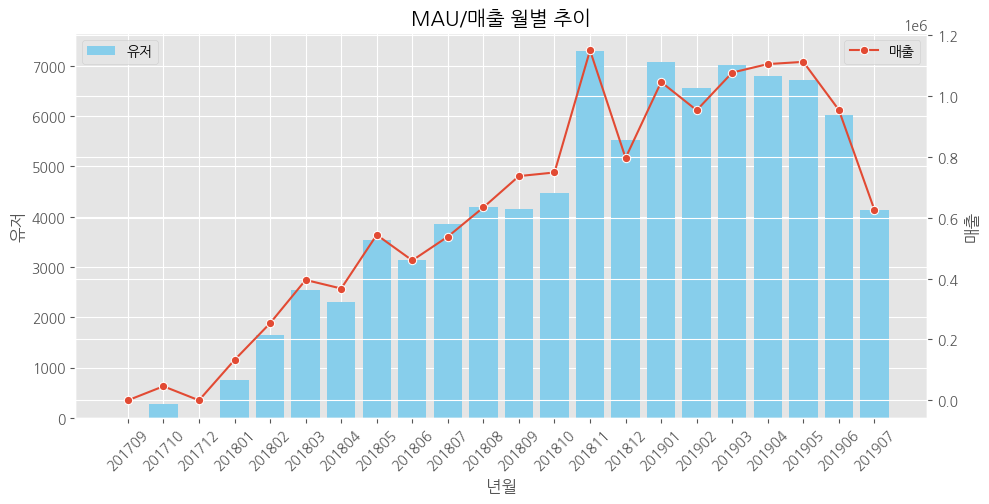

In [2]:
orders = pd.read_csv(dataset_path+'orders.csv')
order_items = pd.read_csv(dataset_path+'order_items.csv')
order = orders.copy()

order['Order_purchase_timestamp'] = pd.to_datetime(order['Order_purchase_timestamp'])
order['YearMonth'] = order['Order_purchase_timestamp'].dt.strftime('%Y%m')

merged_orders = pd.merge(order, order_items, on='Order_id', how='left')
merged_orders['Revenue'] = merged_orders['Price'] * merged_orders['Order_item_id']
monthly_revenue = merged_orders.groupby('YearMonth')['Revenue'].sum().reset_index()

# MAU
customer =  pd.read_csv(dataset_path+'customers.csv')
order_customer= pd.merge(order,customer,how='left',on='Customer_id')
mau_df = order_customer.groupby('YearMonth')[['Customer_unique_id']].count().reset_index().rename(columns={'Customer_unique_id':'MAU'})
plt.figure(figsize=(11,5))
bars = plt.bar(mau_df['YearMonth'], mau_df['MAU'], color ='skyblue',label='유저')
plt.xlabel("년월")
plt.ylabel("유저")
plt.legend(loc='upper left')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    # plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval,ha='center',va='bottom')
#plt.figure(figsize=(11,5))
plt.twinx()
sns.lineplot(x='YearMonth', y='Revenue', data=monthly_revenue, marker='o',label='매출')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.title("MAU/매출 월별 추이")
plt.legend()
plt.show()

위의 그림은 월별로 **매출 추이**와 **활동 유저**를 시각화한 그림입니다.  
매출 추이와 활동유저는 비슷한 추이를 보이고 있으며 이 두가지 지표를 통해서 기업의 성장을 꾀할 수 있음을 볼 수 있습니다.  
**저는 여기에서 '거래량'을 더하여 기업의 성장이라는 정성적인 목표에 대해서 '(1)매출액', '(2)거래량',(3)활동 유저(MAU)'의 증가**  
라는 정량적인 목표로 이 문제를 정의 하고자 합니다.

### 전략 목표 설정 

기업이 성장하기 위해서 세 가지로 정량적인 수치가 있습니다.

    1. 매출액
    2. 거래량
    3. 활동 유저

또한 이 세가지 정량적인 수치에 대해서 볼 수 있는 관점을 세 가지로 뽑았습니다.

    1. 구매자 관점
    2. 제품 관점
    3. 도시 관점

전체 매출액, 전체 거래 빈도, 전체 활동 유저에 대해서, 각각의 관점에 대해서 분석해 보았습니다.


In [3]:
#Customer-Order Table
#거래하는 고객 종류를 파악하기 위한 테이블

customer = pd.read_csv(dataset_path+'customers.csv')
orders = pd.read_csv(dataset_path+'orders.csv')
orders['Order_purchase_timestamp'] = pd.to_datetime(orders['Order_purchase_timestamp'])
orders['YearMonth'] = orders['Order_purchase_timestamp'].dt.strftime('%Y%m')

order_customer = pd.merge(left=orders, right=customer,how='left',on='Customer_id')


num_custom = customer['Customer_unique_id'].nunique()
old_custom_idx = customer['Customer_unique_id'].value_counts().index[customer['Customer_unique_id'].value_counts() > 1]
customer['old'] = customer.Customer_unique_id.isin(old_custom_idx)

#order-customer-order-item table

#월별 매출 추이 분석을 위한 테이블

order_items = pd.read_csv(dataset_path+'order_items.csv')

items_order_customer = pd.merge(left=order_items,right=order_customer,how='left',on='Order_id')

items_order_customer['Revenue'] = items_order_customer['Price'] + items_order_customer['Freight_value']
items_order_customer['old'] = items_order_customer.Customer_unique_id.isin(old_custom_idx)




<Figure size 2000x500 with 0 Axes>

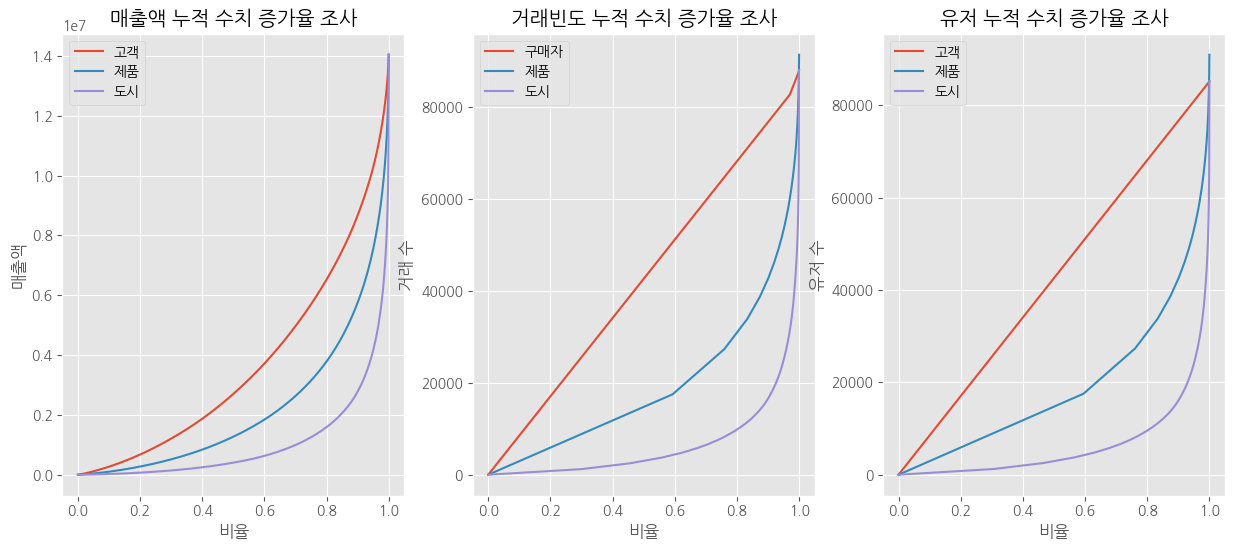

In [4]:
#매출액 누적 수치 시각화

custom_revenue= items_order_customer.groupby('Customer_unique_id')['Revenue'].sum().sort_values().cumsum().reset_index()['Revenue']
product_revenue = items_order_customer.groupby('Product_id')['Revenue'].sum().sort_values().cumsum().reset_index()['Revenue']
city_revenue = items_order_customer.groupby('Customer_city')['Revenue'].sum().sort_values().cumsum().reset_index()['Revenue']

plt.figure(figsize=(20,5))
fig, axes = plt.subplots(ncols=3,figsize=(15, 6))
axes[0].plot(custom_revenue.index/len(custom_revenue.index),custom_revenue.values,label='고객')
axes[0].plot(product_revenue.index/len(product_revenue.index),product_revenue.values,label='제품')
axes[0].plot(city_revenue.index/len(city_revenue.index),city_revenue.values,label='도시')
out_custom_y = np.interp(0.8,custom_revenue.index/len(custom_revenue.index),custom_revenue.values)
out_prod_y= np.interp(0.8,product_revenue.index/len(product_revenue.index),product_revenue.values)
out_city_y = np.interp(0.8,city_revenue.index/len(city_revenue.index),city_revenue.values)
axes[0].set_ylabel('매출액')
axes[0].set_xlabel('비율')
axes[0].set_title("매출액 누적 수치 증가율 조사")
axes[0].legend()

custom_freq = order_customer.Customer_unique_id.value_counts().sort_values().cumsum().reset_index()['Customer_unique_id']
order_product = items_order_customer.drop_duplicates(['Product_id','Order_id'])
product_freq = order_product.Product_id.value_counts().sort_values().cumsum().reset_index()['Product_id']
city_freq = order_customer.Customer_city.value_counts().sort_values().cumsum().reset_index()['Customer_city']
axes[1].plot(custom_freq.index/len(custom_freq.index),custom_freq.values,label='구매자')
axes[1].plot(product_freq.index/len(product_freq.index),product_freq.values,label='제품')
axes[1].plot(city_freq.index/len(city_freq.index),city_freq.values,label='도시')

out_custom_y = np.interp(0.8,custom_freq.index/len(custom_freq.index),custom_freq.values)
out_prod_y = np.interp(0.8,product_freq.index/len(product_freq.index),product_freq.values)
out_city_y = np.interp(0.8,city_freq.index/len(city_freq.index),city_freq.values)
axes[1].set_ylabel('거래 수')
axes[1].set_xlabel('비율')
axes[1].set_title("거래빈도 누적 수치 증가율 조사")
axes[1].legend()

customer_user = customer.groupby('Customer_unique_id')['Customer_unique_id'].nunique().sort_values().cumsum()
product_user = items_order_customer.groupby('Product_id')['Customer_unique_id'].nunique().sort_values().cumsum()
city_user = customer.groupby('Customer_city')['Customer_unique_id'].nunique().sort_values().cumsum()
axes[2].plot(np.arange(1,len(customer_user)+1)/len(customer_user), customer_user.values,label='고객')
axes[2].plot(np.arange(1,len(product_user)+1)/len(product_user), product_user.values,label='제품')
axes[2].plot(np.arange(1,len(city_user)+1)/len(city_user), city_user.values,label='도시')
axes[2].set_ylabel('유저 수')
axes[2].set_xlabel('비율')
axes[2].set_title("유저 누적 수치 증가율 조사")
axes[2].legend()

첫번째그림은 전체 매출액에 대해서 각 고객, 제품, 구매자의 도시에 따른 매출액을 오름차순으로 정렬하여 누적 수치를 가시화하였습니다.  
두번째 그림과, 세번째 그림 역시, 각 카테고리군에 따라서, 거래량과 유저 수 누적 수치를 가시화하였습니다. 

가장 눈에 띄게 보이는 것은 두 번째 그림과 세 번째 그림의 그래프가 동일하다는 것입니다.   
이것은 **거래빈도와 유저 수가 동일한 범주로 보아야 한다**로 해석하게 됬습니다.  

그 이유로 유저 수에 대한 분석을 진행하였는데, 유저 수를 증가시키기 위해서는 두 가지 분류로 나뉩니다.
    
    1)신규유저 증가
    2)기존유저 유지

신규 유저 수가 증가하는 것은 거래 수가 증가하는 것과 같은 의미입니다. 기존 유저가 아닌 새로운 유저가 증가하는 것은 거래가 증가하는 것과 같다는 것입니다.   그러면 2번이상 거래하는 유저를 기존 유저라고 할 때 그들의 비율이 높지 않기 때문에, 거래량과 유저 수를 동일한 범주로 놓아도 된다고 생각했습니다.

재구매가 이루어진 구매자를 **기존 고객**, 재구매가 이루어지지 않은 구매자를 **신규 고객**을 설정하고 가시화했습니다.

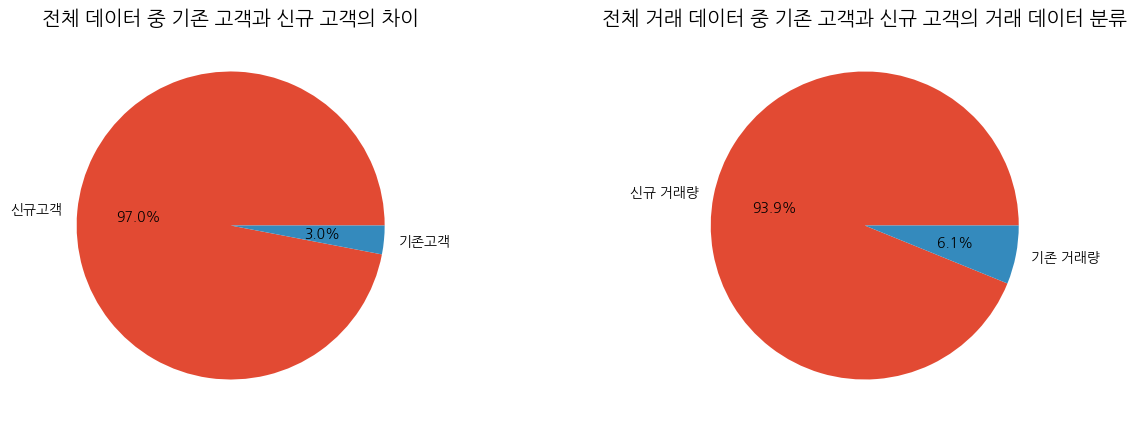

In [5]:
#신규/기존 고객 분류
#Order_id, Customer_unique_id, YearMonth
import seaborn as sns
import matplotlib.pyplot as plt


num_old_custom = customer.loc[customer.old, 'Customer_unique_id'].nunique()

fig, axes = plt.subplots(ncols=2, figsize=(15,5))
axes[0].pie([num_custom-num_old_custom,num_old_custom],labels=['신규고객','기존고객'],autopct='%1.1f%%')
axes[0].set_title("전체 데이터 중 기존 고객과 신규 고객의 차이")

axes[1].pie([len(orders)-order_customer.loc[order_customer.Customer_unique_id.isin(old_custom_idx),'Customer_id'].count(), order_customer.loc[order_customer.Customer_unique_id.isin(old_custom_idx),'Customer_id'].count()], labels=['신규 거래량', '기존 거래량'], autopct='%1.1f%%')
axes[1].set_title('전체 거래 데이터 중 기존 고객과 신규 고객의 거래 데이터 분류')
plt.show()

예상대로 신규고객이 기존고객보다 상당히 많음을 볼 수 있습니다.  
전체 거래 내역을 통해서 2번 이상 구매가 이루어진 구매자를 기존 고객으로, 1번만 구매한 구매자를 신규 고객으로 분류하였을 때,  
**97%가 신규 구매자이고, 3%가 기존 구매자입니다.**   

또한, 거래량 데이터가 신규 거래에 비해 기존 거래가 6.1%에 불가하다는 수치는 3%의 기존 구매자가 한번 정도 더 거래했다는 수치였기에,   
현재 데이터 상으로, 유저 수 증가와 거래량에 대해서 같은 범주에 두어도 된다라고 해석했습니다.

그렇지만, **신규유저가 많다는 것은  신규유저가 기존유저로 유입된다면 많은 활동 유저 수의 증가를 예상할 수 있다는 것을 말합니다.**  
이점을 고려할 때, 신규유저를 기존유저로 만드는 전략의 방향성에 대해서 마지막으로 검증해야 했습니다.

###    월별 매출액과 재구매율 시각화

Text(0, 0.5, '매출비율')

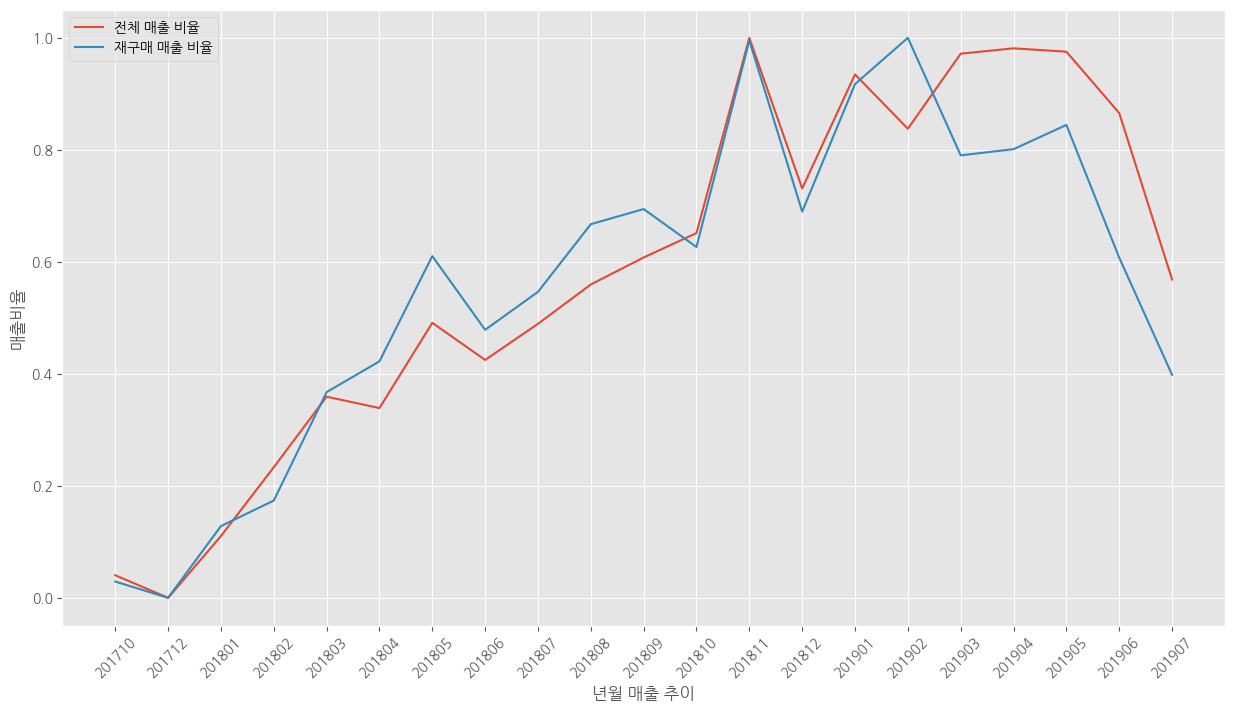

In [6]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

#월별 매출액

data_all = items_order_customer.groupby('YearMonth')[['Revenue']].sum().reset_index()
data_old = items_order_customer.loc[items_order_customer['old']].groupby('YearMonth')[['Revenue']].sum().reset_index()

scaler_all = MinMaxScaler()
scaler_old = MinMaxScaler()

scaler_all.fit(data_all[['Revenue']])
scaler_old.fit(data_old[['Revenue']])

data_all['normalize'] = scaler_all.transform(data_all[['Revenue']])
data_old['normalize'] = scaler_old.transform(data_old[['Revenue']])

plt.figure(figsize=(15,8))
sns.lineplot(x='YearMonth',y= 'normalize',data=data_all, markers='o',label='전체 매출 비율')
sns.lineplot(x='YearMonth',y= 'normalize',data=data_old, markers='o',label='재구매 매출 비율')
plt.xlabel('년월 매출 추이')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.ylabel('매출비율')


전체 거래액과 재구매하는 거래액의 연관성을 보기 위해서 0과 1사이의 값으로 스케일을 조정하여 정규화한 그래프입니다.  
이 그래프를 통해서 둘 사이가 상당히 많이 연관되어 있음을 알 수있습다. 이것을 앞서서 본 결과와 같이 해석하면  

**기존 구매율을 늘리는 것의 영향도가 전체 거래액에 영향을 끼치지 않기에 전체 구매액과 거래액이 증가할 때,**  
**자연스럽게 재구매하는 사람들이 늘어난다고 이 그래프를 해석할 수 있습니다.**

따라서 신규 유저를 기존 유저로 바꾸는 방향이 아닌, 

**유저 수를 제외 한 전체적인 매출액과 거래량을 종속변수로 두고 회귀 분석하는 접근하는 방향**으로 설정하였습니다. 

고객, 제품, 도시 관점에서 매출액과 거래량에 대한 이상치를 탐색했습니다.

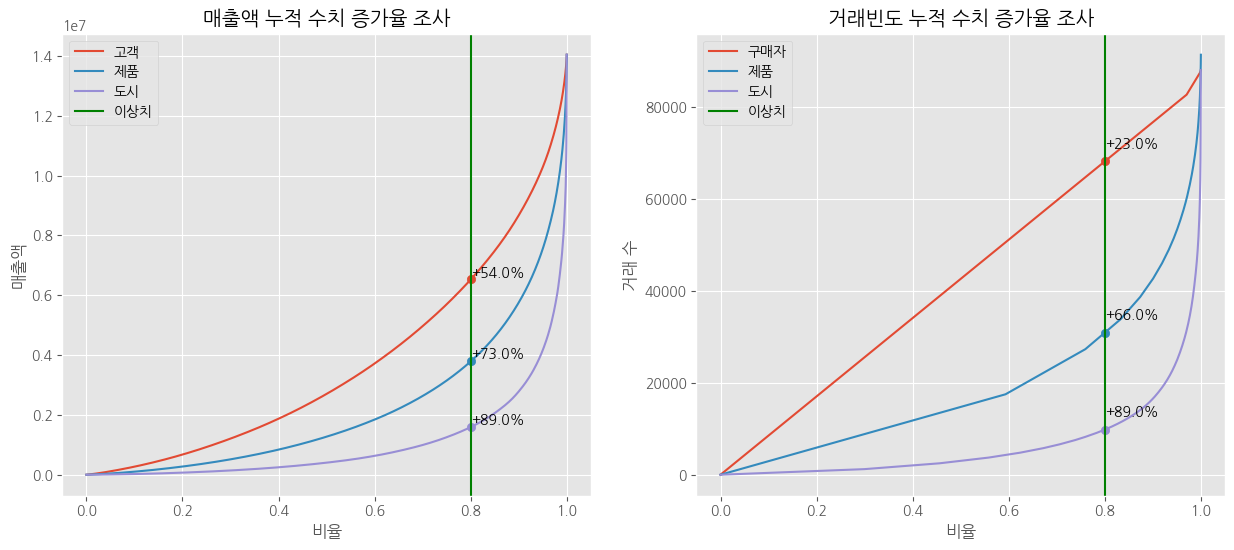

In [7]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 6))
axes[0].plot(custom_revenue.index/len(custom_revenue.index),custom_revenue.values,label='고객')
axes[0].plot(product_revenue.index/len(product_revenue.index),product_revenue.values,label='제품')
axes[0].plot(city_revenue.index/len(city_revenue.index),city_revenue.values,label='도시')
axes[0].axvline(x=0.8,color='green',label='이상치')
out_custom_y = np.interp(0.8,custom_revenue.index/len(custom_revenue.index),custom_revenue.values)
out_prod_y= np.interp(0.8,product_revenue.index/len(product_revenue.index),product_revenue.values)
out_city_y = np.interp(0.8,city_revenue.index/len(city_revenue.index),city_revenue.values)
axes[0].scatter(0.8,out_custom_y)
axes[0].text(0.8,out_custom_y+100000,f'+{round((1 - (out_custom_y/max(custom_revenue.values))),2)*100}%')
axes[0].scatter(0.8,out_prod_y)
axes[0].text(0.8,out_prod_y+100000,f'+{round((1 - (out_prod_y/max(product_revenue.values))),2)*100}%')
axes[0].scatter(0.8,out_city_y)
axes[0].text(0.8,out_city_y+100000,f'+{round((1 - (out_city_y/max(city_revenue.values))),2)*100}%')
axes[0].set_ylabel('매출액')
axes[0].set_xlabel('비율')
axes[0].set_title("매출액 누적 수치 증가율 조사")
axes[0].legend()

custom_freq = order_customer.Customer_unique_id.value_counts().sort_values().cumsum().reset_index()['Customer_unique_id']
order_product = items_order_customer.drop_duplicates(['Product_id','Order_id'])
product_freq = order_product.Product_id.value_counts().sort_values().cumsum().reset_index()['Product_id']
city_freq = order_customer.Customer_city.value_counts().sort_values().cumsum().reset_index()['Customer_city']
axes[1].plot(custom_freq.index/len(custom_freq.index),custom_freq.values,label='구매자')
axes[1].plot(product_freq.index/len(product_freq.index),product_freq.values,label='제품')
axes[1].plot(city_freq.index/len(city_freq.index),city_freq.values,label='도시')

out_custom_y = np.interp(0.8,custom_freq.index/len(custom_freq.index),custom_freq.values)
out_prod_y = np.interp(0.8,product_freq.index/len(product_freq.index),product_freq.values)
out_city_y = np.interp(0.8,city_freq.index/len(city_freq.index),city_freq.values)

axes[1].scatter(0.8,out_custom_y)
axes[1].text(0.8,out_custom_y+3000, f'+{round(1-out_custom_y/max(custom_freq.values),2)*100}%')
axes[1].scatter(0.8,out_prod_y)
axes[1].text(0.8,out_prod_y+3000, f'+{round(1-out_prod_y/max(product_freq.values),2)*100}%')
axes[1].scatter(0.8,out_city_y)
axes[1].text(0.8,out_city_y+3000, f'+{round(1-out_city_y/max(city_freq.values),2)*100}%')

axes[1].axvline(x=0.8,color='green', label='이상치')
axes[1].set_ylabel('거래 수')
axes[1].set_xlabel('비율')
axes[1].set_title("거래빈도 누적 수치 증가율 조사")
axes[1].legend()


**매출액에 대해서 데이터의 상위 20%의 고객, 제품, 도시 들이, 거래량에 대해서는 데이터의 상위 20%의 제품, 도시들이**    
**다른 값들과의 두드러진 증가인 이상치가 있음을 알 수 있었습니다.**

그래프에 표시된 값들 해당 지점 이후의 값들이 가지는 전체 매출액 및 거래량에 대한 퍼센테이지입니다.  
방금 언급한 각 이상치에 대해서 50%이상의 값의 범위를 차지하고 있음을 볼 수 있습니다.

이 이상치가 유의미한 값을 가지고 있다고 생각하고 분석하려고 합니다.

매출액과 거래량에 대해서 상위 20% 이상의 값이 전체 매출액의 50%이상을 차지하므로 20%의 값과 나머지 80%의 값을 다른 클래스로 분류함으로써

독립 변수의 정보량과 중요성을 파악하겠습니다. 

###   고객 관점

**고객 관점에서 제가 설정한 독립변수는 다음과 같습니다.**

<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>평균 배송비</td><td>ship_fee</td><td>고객이 주문한 거래의 평균 배송비</td></tr>
<tr><td>평균 배송일</td><td>ship_diff</td><td>고객이 주문한 거래의 평균 배송일</td></tr>
<tr><td>배송 적중률</td><td>ship_heat</td><td>고객이 주문한 예상 배송일이 실제 배송일보다 빨리 도착하거나 제 날에 도착할 확률</td></tr>
</table>

**고객 관점에서 제가 설정한 종속변수는 다음과 같습니다.**
<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>누적 거래액</td><td>Revenue</td><td>True/False</td></tr>
</table>

In [8]:
#   고객 독립변수 정의

from datetime import datetime
#거래액
final_customer = pd.DataFrame()
final_customer['Revenue']= items_order_customer.groupby('Customer_unique_id')['Revenue'].sum()

#거래량
final_customer['count']= order_customer.groupby('Customer_unique_id')['Order_id'].count()

# 평균 배송 비
final_customer['ship_fee']= items_order_customer.groupby('Customer_unique_id')['Freight_value'].mean()

# 배송 적중률
order_customer['ship_heat'] = order_customer['Order_delivered_customer_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) < order_customer['Order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
final_customer['ship_heat'] = order_customer.groupby('Customer_unique_id')['ship_heat'].sum() / order_customer.groupby('Customer_unique_id')['ship_heat'].count()
# 배송 시간
order_customer["ship_diff"] = (order_customer['Order_delivered_customer_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S")) - order_customer['Order_purchase_timestamp']).apply(lambda x : x.days)
final_customer['ship_diff'] = order_customer.groupby('Customer_unique_id')['ship_diff'].mean()

final_customer

,Revenue,count,ship_fee,ship_heat,ship_diff
Customer_unique_id,,,,,
CUSTOMER_Unique_00000,146.87,1,21.88,1.0,8.0
CUSTOMER_Unique_00001,335.48,1,46.48,1.0,16.0
CUSTOMER_Unique_00002,157.73,1,17.79,0.0,26.0
CUSTOMER_Unique_00003,173.30,1,23.36,1.0,14.0
CUSTOMER_Unique_00004,565.88,2,29.68,1.0,11.5
...,...,...,...,...,...
CUSTOMER_Unique_85234,88.78,1,13.88,1.0,6.0
CUSTOMER_Unique_85235,129.06,1,14.16,1.0,7.0
CUSTOMER_Unique_85236,56.04,1,19.04,0.0,30.0


In [9]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

final_customer['label'] = False
final_customer= final_customer.sort_values(by='Revenue')
final_customer.loc[int(len(final_customer)*0.8):,'label'] = True

custom_train_y = final_customer.pop('label')
final_customer.pop('Revenue')
final_customer.pop('count')
X_train, X_valid, y_train, y_valid= train_test_split(final_customer,custom_train_y, test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3,random_state=42)
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))

0.8226119139936553
0.8205369206367855


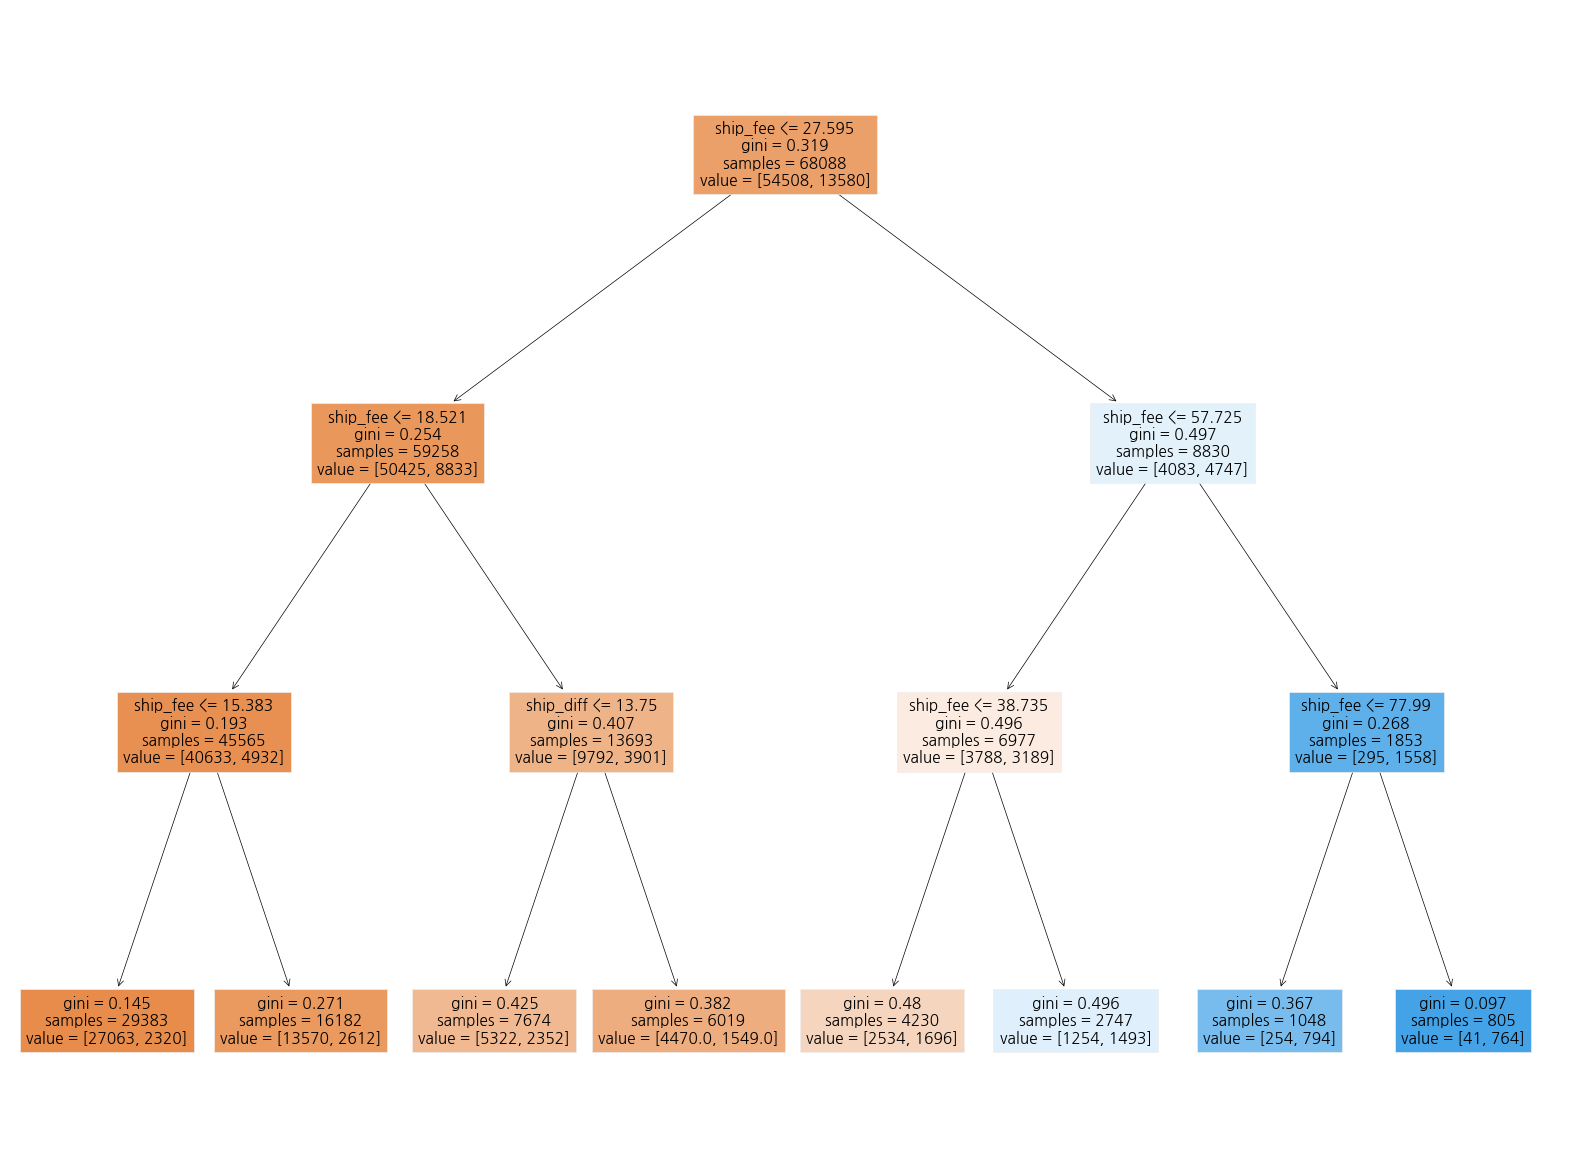

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(model, filled=True, feature_names=['ship_fee','ship_heat','ship_diff'])
plt.show()

고 매출을 올리는 조건을 파악할 때, ship_fee 즉 배송비가 가장 중요함을 볼 수 있었습니다.  

이는 고객의 거래 데이터가 부족한 관계로 나온 정보가 되었습니다.

이를 상관관계 분석을 통해서 다시 확인해보면 

/home/david/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/home/david/.local/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/david/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


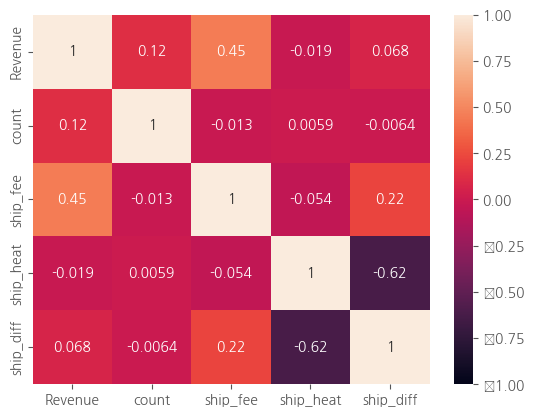

In [26]:
final_customer = pd.DataFrame()
final_customer['Revenue']= items_order_customer.groupby('Customer_unique_id')['Revenue'].sum()

#거래량
final_customer['count']= order_customer.groupby('Customer_unique_id')['Order_id'].count()

# 평균 배송 비
final_customer['ship_fee']= items_order_customer.groupby('Customer_unique_id')['Freight_value'].mean()

# 배송 적중률
order_customer['ship_heat'] = order_customer['Order_delivered_customer_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) < order_customer['Order_estimated_delivery_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
final_customer['ship_heat'] = order_customer.groupby('Customer_unique_id')['ship_heat'].sum() / order_customer.groupby('Customer_unique_id')['ship_heat'].count()
# 배송 시간
order_customer["ship_diff"] = (order_customer['Order_delivered_customer_date'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S")) - order_customer['Order_purchase_timestamp']).apply(lambda x : x.days)
final_customer['ship_diff'] = order_customer.groupby('Customer_unique_id')['ship_diff'].mean()

sns.heatmap(final_customer.corr(),vmin=-1,vmax=1,annot=True)


고객 관점에서 유의미한 상관관계 값을 가진다고 나타난 것은,  
누적 거래액 - 배송비 - 배송일 - 배송적중률 이었습니다. 

**배송적중률(ship_heat) -> 배송일(ship_diff): -0.62**
- 배송 적중률은 실제로 배송되는 기간이 길어질 수록 감소합니다.

**배송일(ship_diff) -> 배송비(ship_fee) : +0.22**
- 배송일이 길어질수록 배송비가 증가합니다.

**배송비(ship_fee)) -> 누적 거래액(Revenue) : +0.45**
- 배송비가 많아질 수록  누적거래액이 증가합니다.

LightGBM 모델을 사용해서 각 독립변수의 중요성을 가시화했습니다.

In [11]:
lgb_train = lgb.Dataset(X_train,y_train,categorical_feature=['ship_heat'])
lgb_eval = lgb.Dataset(X_valid, y_valid,categorical_feature=['ship_heat'],reference=lgb_train)

lgbm_params = {
    "objective":"binary",        
    "random_seed":1234,
}

model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100)



[LightGBM] [Info] Number of positive: 13650, number of negative: 54438
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 408
[LightGBM] [Info] Number of data points in the train set: 68088, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.200476 -> initscore=-1.383323
[LightGBM] [Info] Start training from score -1.383323


<Axes: >

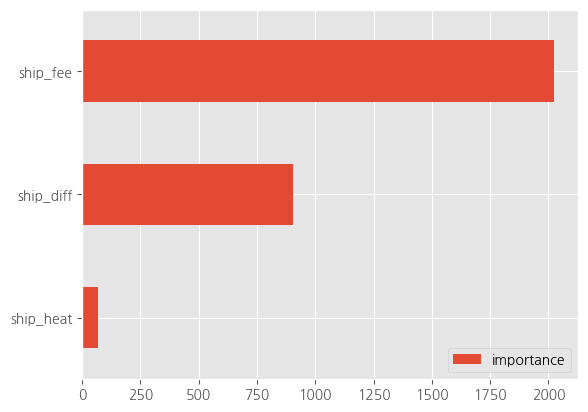

In [12]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

In [13]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [14]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.8269987663749045

**이 역시 배송비가 중요하다는 점이 대두됩니다.**

###   제품 관점

**제품 관점에서 제가 설정한 독립변수는 다음과 같습니다.**

<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>제품 무게</td><td>Product_weight_g</td><td>제품의 무게</td></tr>
<tr><td>제품 부피</td><td>volume_cm3</td><td>제품 부피</td></tr>
<tr><td>제품의 판매 가격</td><td>Price</td><td>제품 가격</td></tr>
<tr><td>제품 배송비</td><td>Freight_value</td><td>배송비</td></tr>
<tr><td>제품 카테고리</td><td>Category</td><td>카테고리</td></tr>
<tr><td>제품이 포함된 거래의 평균 액수</td><td>mean_order_price</td><td>제품이 포함된 거래의 평균 액수</td></tr>
</table>

**제품 관점에서 제가 설정한 종속변수는 다음과 같습니다.**
<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>누적 제품 판매액</td><td>Revenue</td><td>True/False</td></tr>
<tr><td>누적 제품 거래량</td><td>count</td><td>True/False</td></tr>
</table>

In [18]:
#제품 관점

product = pd.read_csv(dataset_path+'products.csv')
product = product[~(product['Product_length_cm'] == 'Unknown')]
_list = ['Product_weight_g',	'Product_length_cm',	'Product_height_cm',	'Product_width_cm']
for l in _list:
    product[l] = product[l].apply(lambda x : float(x))
final_product = product[['Product_id','Product_weight_g']]
#부피
final_product['volume_cm3'] = product['Product_length_cm'] * product['Product_height_cm']* product['Product_width_cm']
#배송비
items_product = pd.merge(left=order_items,right=product,how='left',on='Product_id')
final_product = pd.merge(final_product, items_product.groupby('Product_id')['Freight_value'].mean(), how='left',on='Product_id')
final_product = final_product[~final_product.Freight_value.isnull()]
#가격
final_product = pd.merge(final_product, items_product.groupby('Product_id')['Price'].mean(), how='left',on='Product_id')
payments = pd.read_csv(dataset_path+'payments.csv')
product_order_dict= {}
for i in final_product.Product_id:
    product_order_dict[i] = order_items[order_items.Product_id == i]['Order_id'].values
_list = []
for k, v in product_order_dict.items():
    _list.append(len(v))
final_product['count']= np.array(_list)
_list = []
for k, v in product_order_dict.items():
    value = 0
    for i in v:
        value += payments.loc[payments['Order_id'] == i, 'Payment_value'].values[0]
    _list.append(value/len(v))
final_product['mean_order_price'] = np.array(_list)

final_product = pd.merge(final_product,items_order_customer.groupby('Product_id')['Revenue'].sum(),how='left',on='Product_id')

/tmp/ipykernel_168041/1376782828.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_product['volume_cm3'] = product['Product_length_cm'] * product['Product_height_cm']* product['Product_width_cm']


KeyboardInterrupt: 

In [29]:
#앞의 쉘 연산이 많아 저장하고 따로 가져옴
from sklearn.preprocessing import LabelEncoder

final_product = pd.read_csv("./data/final_product.csv")
final_product = final_product.drop(columns='Unnamed: 0')
product = pd.read_csv(dataset_path+'products.csv')
final_product = pd.merge(final_product, product[['Product_id', 'Product_category_name']], how='left', on='Product_id')
final_product = final_product.set_index('Product_id')

label = LabelEncoder()

# final_product['Product_category_name'] = final_product['Product_category_name'].astype('category')

final_product['encode'] = label.fit_transform(final_product['Product_category_name'])

final_product['label'] = False
final_product = final_product.sort_values(by='Revenue')
final_product.loc[int(len(final_product)*0.8):, 'label'] = True
prod_train_Y = final_product.pop('label')

final_product.pop('Revenue')
final_product.pop('count')
final_product.pop('Product_category_name')


X_train, X_valid, y_train, y_valid = train_test_split(final_product, prod_train_Y, test_size=0.2)

tree_model = DecisionTreeClassifier(max_depth=3,random_state=24)
tree_model.fit(X_train,y_train)
print(tree_model.score(X_train, y_train))
print(tree_model.score(X_valid, y_valid))



0.8536657888029904
0.8642541624193001


In [30]:
X_train

,Product_weight_g,volume_cm3,Freight_value,Price,mean_order_price,encode
Product_id,,,,,,
PRODUCT_09103,2200.0,15120.0,21.46000,139.000,160.46000,69
PRODUCT_07446,1000.0,352.0,38.28000,104.690,142.97000,71
PRODUCT_26944,3800.0,24192.0,17.03000,199.990,217.02000,8
PRODUCT_19053,700.0,2688.0,17.92000,21.900,39.82000,35
PRODUCT_23154,100.0,2400.0,11.73000,159.990,25.05000,6
...,...,...,...,...,...,...
PRODUCT_06137,983.0,19536.0,19.06000,169.990,189.05000,70
PRODUCT_08446,300.0,2704.0,25.47000,139.900,165.37000,71
PRODUCT_12660,500.0,10500.0,16.28125,46.000,77.73625,44


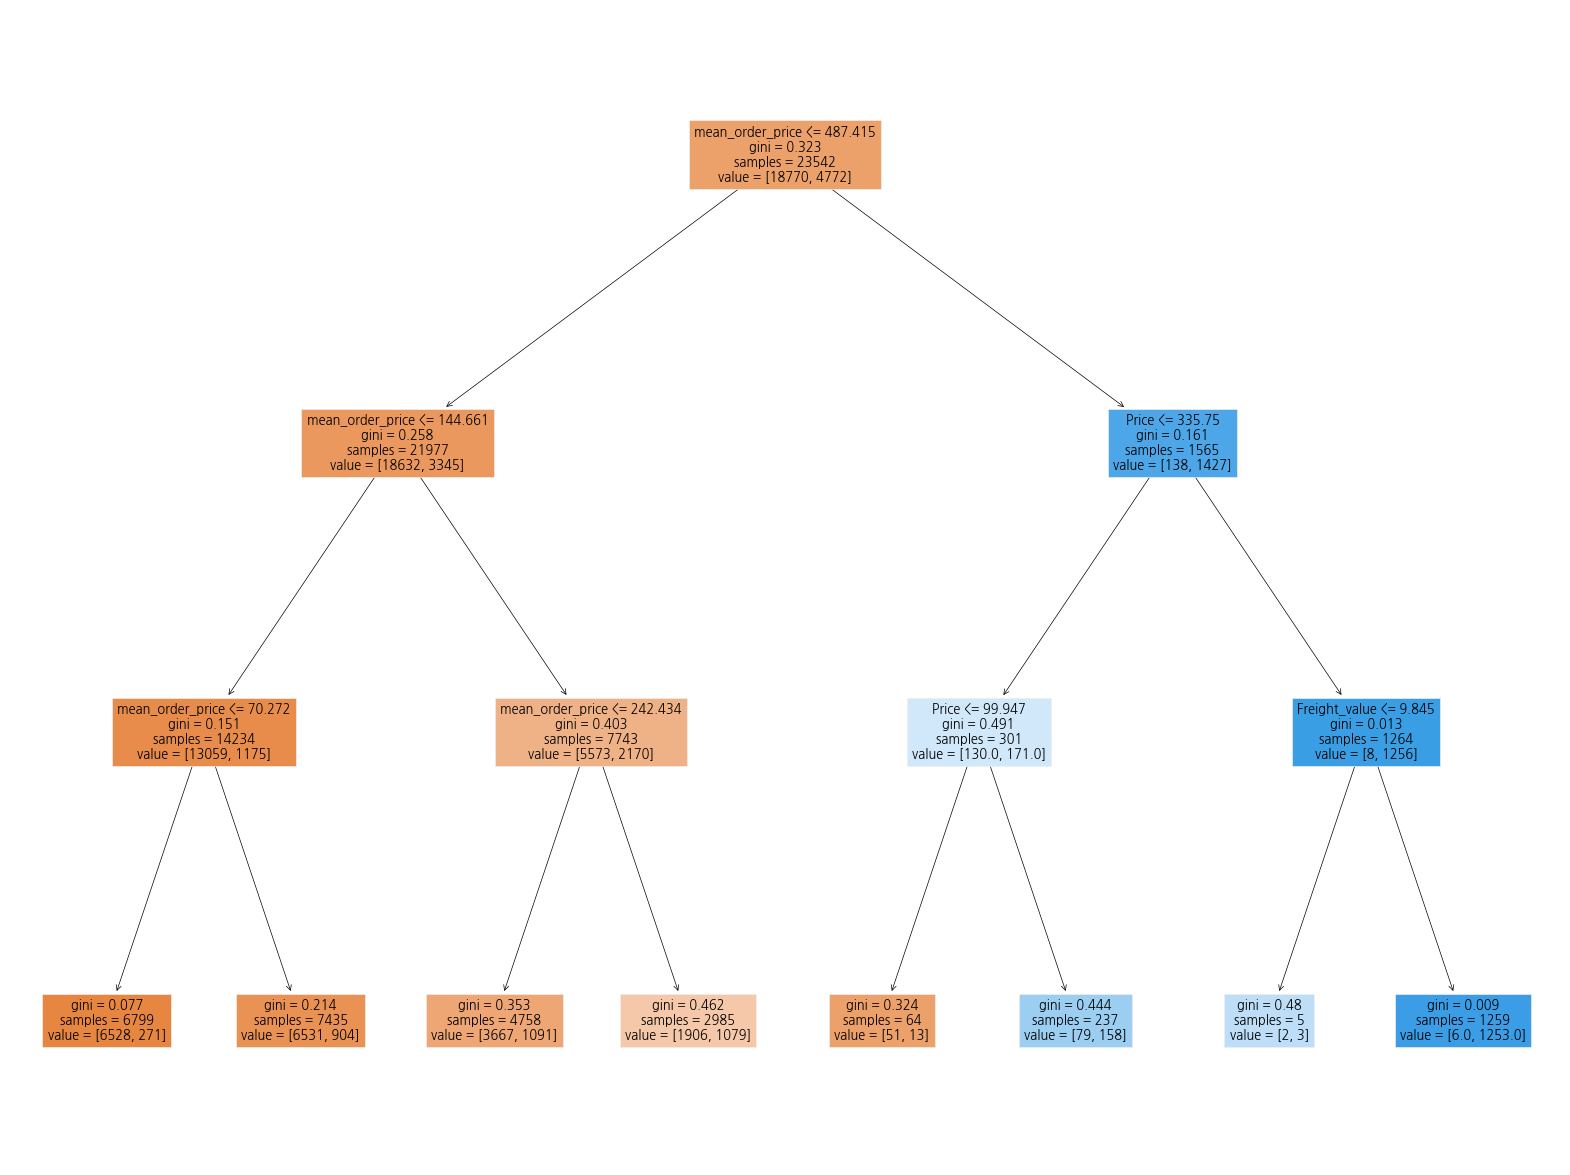

In [31]:
plt.figure(figsize=(20,15))
plot_tree(tree_model, filled=True, feature_names=['Product_weight_g','volume_cm3','Freight_value','Price','mean_order_price','encode'])
plt.show()

고객 관점에서 보았을 때와 동일하게 

제품의 가격을 올린는 방향을 말하고 있습니다. 

실제로 배송비 가격이 높은 가격인 물품이 고매출을 올리는 요인되 되는 점이 흥미롭습니다.

In [ ]:
categorical_features = ['Product_category_name']

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid,categorical_feature=categorical_features, reference=lgb_train)

lgbm_params = {
    "objective": "binary",        
    "random_seed": 1234,
}

model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=[lgb_train, lgb_eval], 
                      num_boost_round=100)

importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

In [54]:
final_product = pd.read_csv("./data/final_product.csv")
final_product = final_product.drop(columns='Unnamed: 0')
product = pd.read_csv(dataset_path+'products.csv')
final_product = pd.merge(final_product, product[['Product_id', 'Product_category_name']], how='left', on='Product_id')
final_product = final_product.set_index('Product_id')

final_product['Product_category_name'] = final_product['Product_category_name'].astype('category')
final_product['label'] = False
final_product = final_product.sort_values('count')
final_product.loc[int(len(final_product)*0.8):, 'label'] = True
prod_train_Y = final_product.pop('label')


In [56]:
final_product.pop('Revenue')
final_product.pop('count')

Product_id
PRODUCT_00000      1
PRODUCT_16815      1
PRODUCT_16814      1
PRODUCT_16813      1
PRODUCT_16812      1
                ... 
PRODUCT_27081    377
PRODUCT_04082    382
PRODUCT_08596    468
PRODUCT_12522    476
PRODUCT_11967    516
Name: count, Length: 29428, dtype: int64

[LightGBM] [Info] Number of positive: 4683, number of negative: 18859
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 23542, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.198921 -> initscore=-1.393051
[LightGBM] [Info] Start training from score -1.393051


<Axes: >

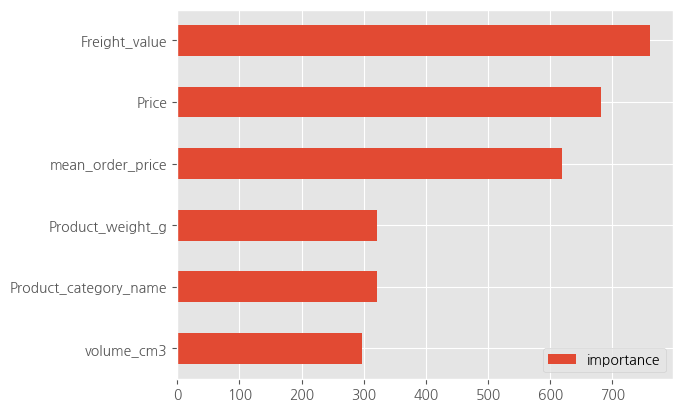

In [59]:
X_train, X_valid, y_train,y_valid= train_test_split(final_product,prod_train_Y,test_size=0.2)

lgb_train = lgb.Dataset(X_train,y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid,y_valid, categorical_feature=categorical_features)

lgbm_params = {
     "objective": "binary",        
    "random_seed": 1234,
}

model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=[lgb_train, lgb_eval], 
                      num_boost_round=100)

importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()


In [58]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, np.round(y_pred))

0.8244988107373429

###   도시 관점

도시를 기준으로 도시는 거래액과 거래량을 보았을 때, 큰 폭의 증가가 있는 것을 확인할 수 있었습니다. 

/tmp/ipykernel_108081/1894783911.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(labels= top10_custom_cities,rotation=45)
/tmp/ipykernel_108081/1894783911.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(labels= top10_seller_cities,rotation=45)


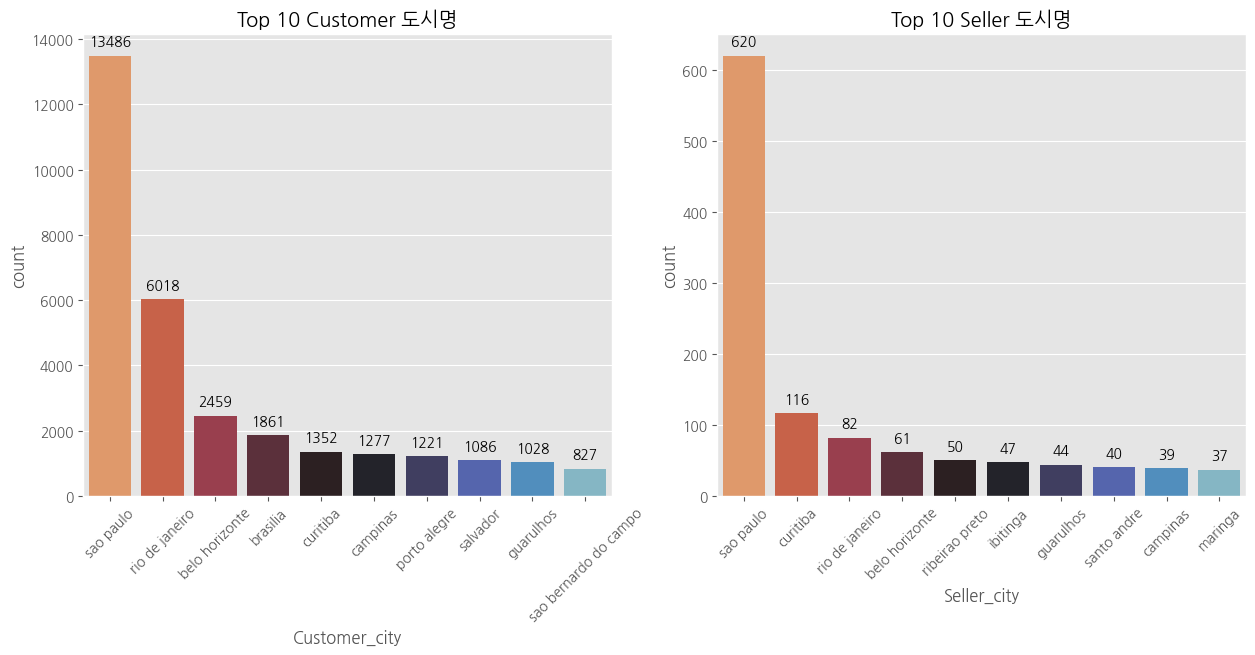

In [10]:
# 상위 10개 도시 선택
top10_custom_cities = customer['Customer_city'].value_counts().head(10).index
# 상위 10개 도시에 대한 데이터만 필터링
data = customer[customer['Customer_city'].isin(top10_custom_cities)]

# 시각화
fig, axes = plt.subplots(ncols=2,figsize=(15,6))

sns.countplot(x='Customer_city', data=data,
                   order=data['Customer_city'].value_counts().index,
                   palette='icefire_r',ax=axes[0])

axes[0].set_title('Top 10 Customer 도시명')
#axes[0].set_xticks(rotation=45) # 도시 이름이 긴 경우를 위해 x축 라벨 회전

# 각 바 위에 값 표시
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')
axes[0].set_xticklabels(labels= top10_custom_cities,rotation=45)

# 상위 10개 도시 선택
seller = pd.read_csv(dataset_path+'sellers.csv')
top10_seller_cities = seller['Seller_city'].value_counts().head(10).index

# 상위 10개 도시에 대한 데이터만 필터링
data = seller[seller['Seller_city'].isin(top10_seller_cities)]

sns.countplot(x='Seller_city', data=data,
                   order=data['Seller_city'].value_counts().index,
                   palette='icefire_r',ax=axes[1])

axes[1].set_xticklabels(labels= top10_seller_cities,rotation=45)
axes[1].set_title('Top 10 Seller 도시명')
#plt.xticks(rotation=45) # 도시 이름이 긴 경우를 위해 x축 라벨 회전

# 각 바 위에 값 표시
for p in axes[1].patches:
    axes[1].annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


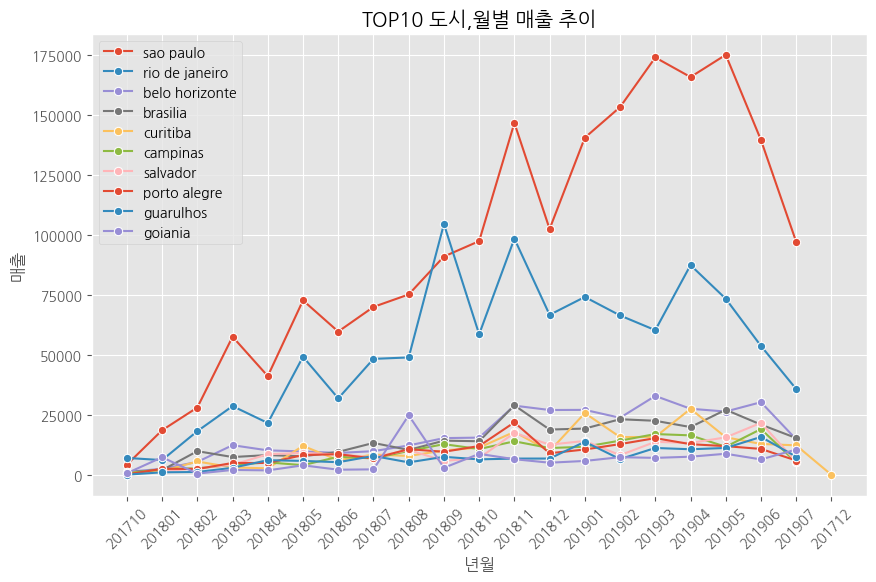

In [12]:
#for i in merged_order_cus_df['Customer_city'].unique():
merged_order_cus_df = pd.merge(left=merged_orders,right=customer,left_on='Customer_id',right_on='Customer_id',how="left")
top10_index = merged_order_cus_df.groupby('Customer_city')['Revenue'].sum().sort_values(ascending=False)[:10].index
plt.figure(figsize=(10, 6))
for i in top10_index:
    index_city = (merged_order_cus_df['Customer_city'] == i)
    monthly_city_revenue = merged_order_cus_df[index_city].groupby('YearMonth')[['Customer_city','Revenue']].sum().reset_index()
    sns.lineplot(x='YearMonth', y='Revenue', data=monthly_city_revenue, marker='o', label=i)

plt.title('TOP10 도시,월별 매출 추이')
plt.xlabel('년월')
plt.ylabel('매출')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

도시의 경우는 sao-paulo, rio-de janeiro가 주로 인프라가 활성화 되었기에, 매출에

두개의 범주로 나눠서 조사할 필요가 있습니다.

    1. sao-paulo, rio-de janeiro 도메인
    2. 그 외 도메인 



Text(0.5, 1.0, '그 외')

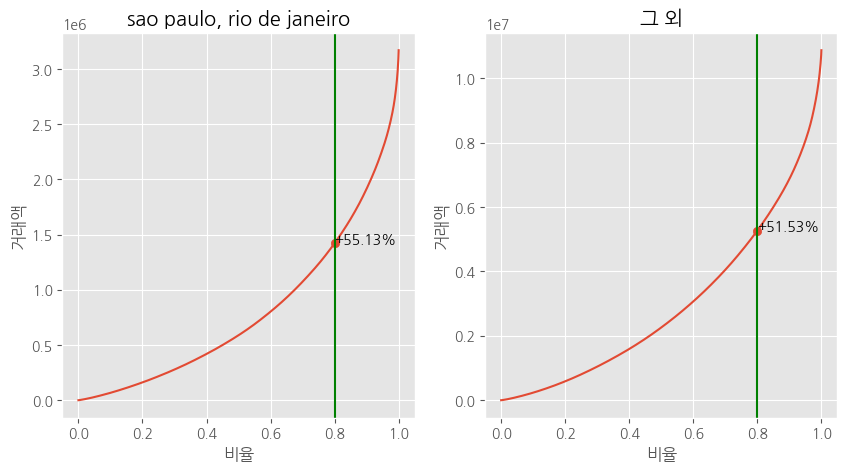

In [11]:
items_order_customer_seller= pd.merge(items_order_customer,seller,how='left',on='Seller_id')
items_order_customer_seller1 = items_order_customer_seller.loc[items_order_customer_seller.Seller_city.isin(np.array(['sao paulo', 'rio de janeiro']))]
items_order_customer_seller2 = items_order_customer_seller.loc[~items_order_customer_seller.Seller_city.isin(np.array(['sao paulo', 'rio de janeiro']))]

scaler = MinMaxScaler()
fig, axes = plt.subplots(ncols=2, figsize=(10,5))
seller_city_revenue1= items_order_customer_seller1[['Revenue']].sort_values(by='Revenue').cumsum().reset_index()
seller_city_revenue2= items_order_customer_seller2[['Revenue']].sort_values(by='Revenue').cumsum().reset_index()
# seller_city_revenue2= items_order_customer_seller2.groupby('Seller_city')[['Revenue']].sum().sort_values(by='Revenue').cumsum().reset_index()
axes[0].plot(seller_city_revenue1.index/(len(seller_city_revenue1)-1), (seller_city_revenue1[['Revenue']].values))
y_height1 = np.interp(0.8,seller_city_revenue1.index/(len(seller_city_revenue1)-1), (seller_city_revenue1['Revenue'].values))
y_height2 = np.interp(0.8,seller_city_revenue2.index/(len(seller_city_revenue2)-1), (seller_city_revenue2['Revenue'].values))

axes[0].axvline(x=0.8,color='green')
axes[0].scatter(0.8,y_height1)
axes[0].text(0.8,y_height1,f"+{round((1-(y_height1/max(seller_city_revenue1['Revenue'].values)))*100,2)}%")
axes[0].set_xlabel('비율')
axes[0].set_ylabel('거래액')
axes[0].set_title('sao paulo, rio de janeiro')
axes[1].plot(seller_city_revenue2.index/len(seller_city_revenue2), (seller_city_revenue2[['Revenue']].values))
axes[1].axvline(x=0.8,color='green')
axes[1].scatter(0.8,y_height2)
axes[1].text(0.8,y_height2,f"+{round((1-(y_height2/max(seller_city_revenue2['Revenue'].values)))*100,2)}%")
axes[1].set_xlabel('비율')
axes[1].set_ylabel('거래액')
axes[1].set_title('그 외')

여기서 두개의 도메인은 각 거래가 가지고 있는 변수들로 이루어지는 공간입니다.  
다만 한 곳은 sao paulo, rio de janeiro 가 Seller city인 곳과 아닌 곳입니다.


그러므로 여기서는 하나의 종속변수 매출액에 대해서만 분석을 하도록 합니다.
여기 데이터 범위에서도 상위 20%의 데이터가 전체 매출액의 50% 이상을 차지하니 데이터 비율 0.8을 기준으로 클래스를 구분하도록 하겠습니다.

**도시 관점에서 제가 설정한 독립변수는 다음과 같습니다.**

<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>판매자와 구매자 간의 거리</td><td>distance</td><td>판매자와 구매자간 거리</td></tr>
<tr><td>배송일</td><td>ship_diff</td><td>제품 부피</td></tr>
</table>

**도시 관점에서 제가 설정한 종속변수는 다음과 같습니다.**
<table>
<tr><td>분류</td><td>컬럼이름</td><td>설명</td></tr>
<tr><td>매출액</td><td>label</td><td>True/False</td></tr>
</table>

데이터 테이블이 커져서 도시 관점에서 데이터는 가공하지 못했습니다.

전체적인 데이터 분석을 끝냈는데, 건진 것은 배송비 하나 밖에 없었습니다.

**배송비가 높을 수록 전체적인 매출이 증가한다** 라는 인사이트를 내놓아야 하니,, 참담합니다..

우선 결론적으로 데이터에 대해서 분석한 것은 다음과 같습니다. 

>   매출액 추이와 거래 유저 수 추이가 비슷
 - 대부분의 거래가 신규 거래이며, 기존 거래량이 없음
 - 따라서 매출액과 유저수 증가량 등의 추이가 거의 동일한다.

>   기존 고객의 거래량이 매우 부족
 - 신규 고객군과 기존 고객군은 각각 97%, 3%임
 - 또한, 거래량은 93.9%, 6.1% 인데 이는 기존 고객이 있다하더라도 거래량이 부족한 상황임

>   전체적인 거래의 증가가 재구매하는 유저의 증가율을 가져옴
 - 전체적인 거래의 증감 비율고 재구매 하는 거래의 증감 비율이 비슷함
 - 재구매되는 거래 내용이 많이 없어 전체 거래액에 영향을 주지 못하는 상황
 - 전체적인 거래의 증감이 재구매의 증감과 동일함

>   
몇개의 거래에 매출이 집중되어 있음
 - 고객, 제품, 도시 관점에서 상위에 있는 데이터 대부분의 매출액을 담당
 - 여러개의 거래를 생각하기 보다, 상위 데이터에 해당하는 데이터를 추정하는 방향이 필요 

 수고많으셨습니다 감사합니다:)